In [15]:
#############
###paths#####
#############
import sys
import os

from importlib_metadata import distribution
pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
sys.path.append(modellingpath + '/lib')
#############
import pickle as pkl
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [31]:

class hill_functions():

    def __init__(self, par_dict):
        for key, value in par_dict.items():
            setattr(self, key, value)

    def noncompetitiveact(self, X, km,n):
        act = ((X / km) ** (n)) / (1 + (X / km) ** (n))
        act = (1 / (1 + (km / (X+1e-08)) ** (n)))
        return act

    def noncompetitiveinh(self, X, km,n):
        inh = 1 / (1 + (X / (km+1e-08)) ** (n))
        return inh


    def noncompetitivediffact(self, X, km,n, kdiff,mudiff):
        act = (1 / (1 + ((mudiff*km) / (kdiff*X)) ** (n)))
        return act

class subcircuitAB_circuit14(hill_functions):
#from circuit14

    def __init__(self,par_dict,stochasticity=0):
        for key,value in par_dict.items():
            setattr(self,key,value)
        setattr(self, 'stochasticity', stochasticity)



    def ddt(self,species_list,t, A,A1,wvn=0):
        B,D = species_list
        dbdt= self.muLVA*(1 + self.VB*self.noncompetitiveact(A,self.Kab, self.nab) - B ) -  B*self.Dr*wvn**2
        dddt= self.muLVA*(1 + self.VD*self.noncompetitiveact(B,self.Kbd,self.nbd) - D ) 

        return dbdt,dddt

In [58]:
# Specify name of circuit and variant investigated
circuit_n='circuit14'
variant='1nd'
# Specifiy number of parameter sets in parameterset file to be loaded
n_param_sets = 10

print(f'Circuit:{circuit_n}, Variant:{variant}')

df= pkl.load( open(modellingpath + "/3954/paper/input/lhs_parameterfiles/df_%s_variant%s_%rparametersets.pkl"%(circuit_n,variant,n_param_sets), "rb"))
par_dict = df.iloc[9].to_dict()



Circuit:circuit14, Variant:1nd


In [59]:
U_ss = []
A_list = np.linspace(1, 30, 100)
for A in A_list:
    T=300
    t = np.linspace(0, T, T*50)
    initial_conditions = [10,10]
    subcircuit = subcircuitAB_circuit14(par_dict)
    sol = odeint(subcircuit.ddt, initial_conditions, t, args=(A,A))
    # print(sol[-1])
    Ustar_ODE=sol[-1]
    U_ss.append(sol[-1,0])


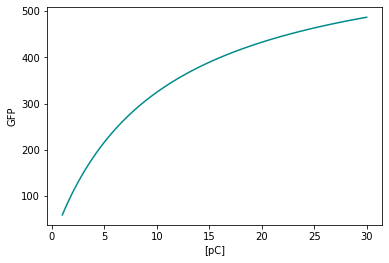

In [60]:
plt.plot(A_list,U_ss, c='darkcyan')
plt.xlabel('[pC]')
plt.ylabel('GFP')
plt.show()